In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
wdbc_df = pd.read_csv("./data.csv")

In [3]:
wdbc_df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
536,91979701,M,14.27,22.55,93.77,629.8,0.10380,0.11540,0.14630,0.06139,...,34.27,104.30,728.3,0.1380,0.2733,0.4234,0.13620,0.2698,0.08351,NaN
321,894618,M,20.16,19.66,131.10,1274.0,0.08020,0.08564,0.11550,0.07726,...,23.03,150.20,1657.0,0.1054,0.1537,0.2606,0.14250,0.3055,0.05933,NaN
331,896864,B,12.98,19.35,84.52,514.0,0.09579,0.11250,0.07107,0.02950,...,21.95,99.21,634.3,0.1288,0.3253,0.3439,0.09858,0.3596,0.09166,NaN
490,91376701,B,12.25,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,...,31.99,92.74,622.9,0.1256,0.1804,0.1230,0.06335,0.3100,0.08203,NaN
269,8910720,B,10.71,20.39,69.50,344.9,0.10820,0.12890,0.08448,0.02867,...,25.21,76.51,410.4,0.1335,0.2550,0.2534,0.08600,0.2605,0.08701,NaN


In [4]:
print("WDBC shape:-\nRows: "+str(wdbc_df.shape[0])+"\nColumns: "+str(wdbc_df.shape[1]))

WDBC shape:-
Rows: 569
Columns: 33


In [5]:
wdbc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
wdbc_df['Unnamed: 32'].sample(5)

257   NaN
14    NaN
309   NaN
407   NaN
251   NaN
Name: Unnamed: 32, dtype: float64

In [7]:
wdbc_df['Unnamed: 32'].unique()

array([nan])

In [8]:
wdbc_df['Unnamed: 32'].isnull().unique()

array([ True])

In [9]:
wdbc_df.drop(columns=["Unnamed: 32", "id"], axis=1, inplace=True)

In [10]:
wdbc_df.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
120,B,11.41,10.82,73.34,403.3,0.09373,0.06685,0.03512,0.02623,0.1667,...,12.82,15.97,83.74,510.5,0.15480,0.2390,0.2102,0.08958,0.3016,0.08523
376,B,10.57,20.22,70.15,338.3,0.09073,0.16600,0.22800,0.05941,0.2188,...,10.85,22.82,76.51,351.9,0.11430,0.3619,0.6030,0.14650,0.2597,0.12000
371,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.11260,0.1737,0.1362,0.08178,0.2487,0.06766
402,B,12.96,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.01883,0.1874,...,14.13,24.61,96.31,621.9,0.09329,0.2318,0.1604,0.06608,0.3207,0.07247
421,B,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,...,16.46,18.34,114.10,809.2,0.13120,0.3635,0.3219,0.11080,0.2827,0.09208


In [11]:
print("Column \t\t     Missing Values\n-------------------------------------")
wdbc_df.isnull().sum()

Column 		     Missing Values
-------------------------------------


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

labels = label_encoder.fit_transform(wdbc_df['diagnosis'])

print("Before Encoding:")
print(wdbc_df['diagnosis'].value_counts())

wdbc_df['diagnosis'] = labels

print("\nAfter Encoding:")
print(wdbc_df['diagnosis'].value_counts())

Before Encoding:
B    357
M    212
Name: diagnosis, dtype: int64

After Encoding:
0    357
1    212
Name: diagnosis, dtype: int64


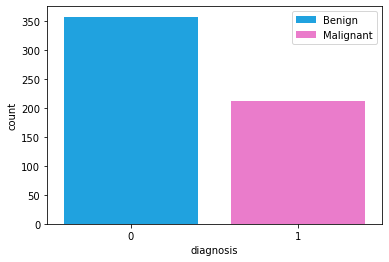

In [13]:
sns.countplot(x='diagnosis', data=wdbc_df, palette=['#00aeff', '#fc6ad3'], hue='diagnosis', dodge=False)
plt.legend(['Benign', 'Malignant'])

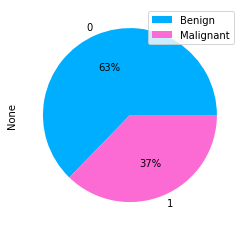

In [14]:
wdbc_df.groupby('diagnosis').size().plot(kind='pie', autopct='%.0f%%', colors=['#00aeff', '#fc6ad3'])
plt.legend(['Benign', 'Malignant'])

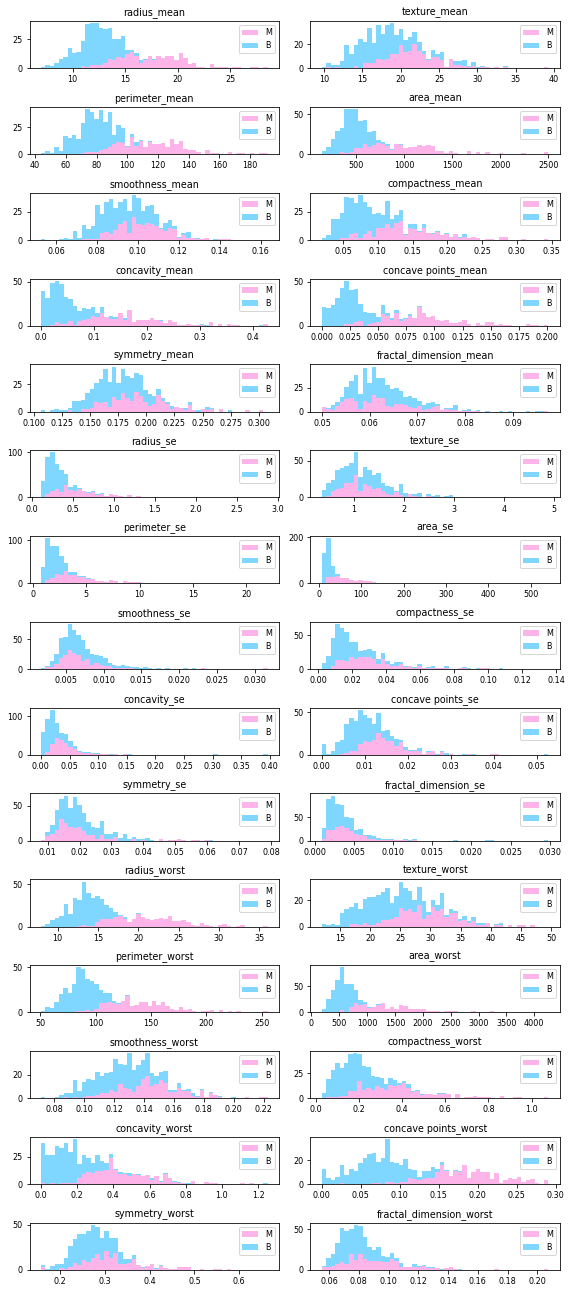

In [15]:
import numpy as np
features_mean=list(wdbc_df.columns[1:])

B_df = wdbc_df[wdbc_df['diagnosis'] == 0]
M_df = wdbc_df[wdbc_df['diagnosis'] == 1]

plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=15, ncols=2, figsize=(8,18))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(wdbc_df[features_mean[idx]]) - min(wdbc_df[features_mean[idx]]))/50
    ax.hist([M_df[features_mean[idx]],B_df[features_mean[idx]]], 
            bins=np.arange(min(wdbc_df[features_mean[idx]]), max(wdbc_df[features_mean[idx]]) + binwidth, binwidth) ,
            alpha=0.5,
            stacked=True, 
            label=['M','B'],
            color=['#fc6ad3','#00aeff'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

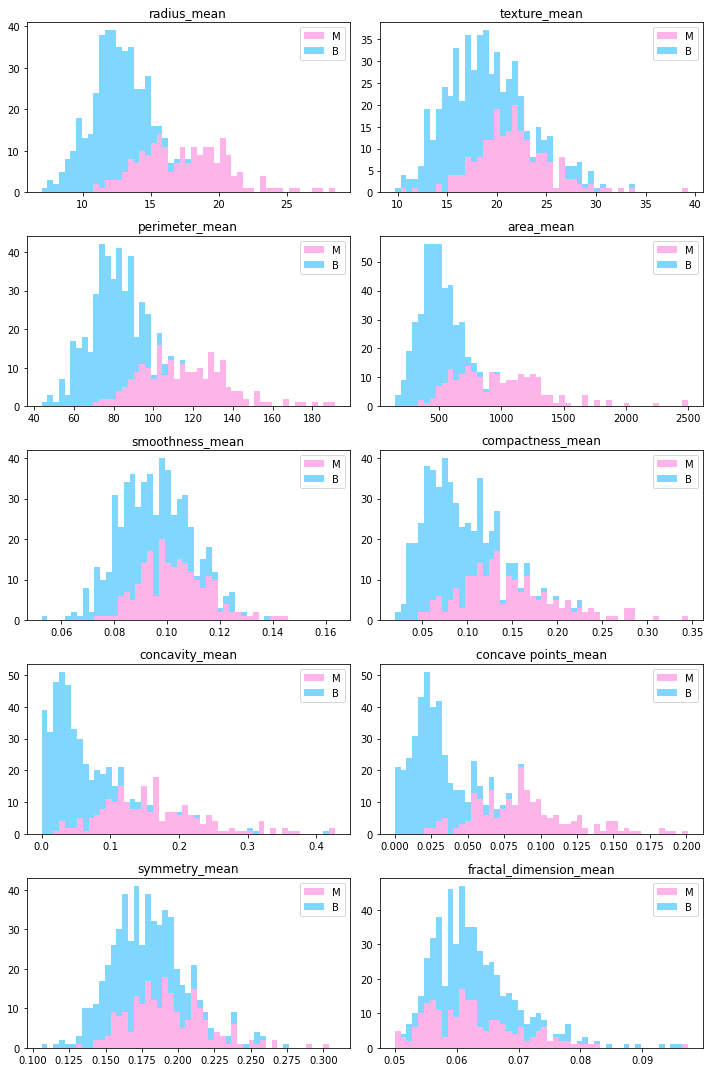

In [16]:
import numpy as np
features_mean=list(wdbc_df.columns[1:11])

B_df = wdbc_df[wdbc_df['diagnosis'] == 0]
M_df = wdbc_df[wdbc_df['diagnosis'] == 1]

plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,15))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(wdbc_df[features_mean[idx]]) - min(wdbc_df[features_mean[idx]]))/50
    ax.hist([M_df[features_mean[idx]],B_df[features_mean[idx]]], 
            bins=np.arange(min(wdbc_df[features_mean[idx]]), max(wdbc_df[features_mean[idx]]) + binwidth, binwidth) ,
            alpha=0.5,
            stacked=True, 
            label=['M','B'],
            color=['#fc6ad3','#00aeff'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

features = ["radius_mean","perimeter_mean","area_mean","compactness_mean","concavity_mean", "concave points_mean"]

train_data = wdbc_df[features]
test_data = wdbc_df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(train_data,
                                 test_data,
                                 random_state=np.random,
                                train_size=0.7)

KNN = KNeighborsClassifier(n_neighbors=5)



y_pred = KNN.fit(x_train, y_train).predict(x_test)

print("KNN Model Accuracy: %.2f%%" %(accuracy_score(y_test, y_pred)*100))

KNN Model Accuracy: 88.30%


In [821]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier() #init the Knn

k_range = list(range(1, 50)) #set the range of k values we want to test
param_grid = dict(n_neighbors = k_range)#assign the params into dictionary

# init the grid algorithm pass the KNN, params of to test, flods(group number)/selection_model, scoring metric
grid = GridSearchCV(knn, param_grid, cv=5, scoring = 'accuracy') 

grid.fit(x_train,y_train)

y_pred = grid.predict(x_test)
print("The Optimal Parameters using 5 fold cross_validtion:")
print("The Best Score: %.2f%%"%(grid.best_score_ * 100))
print("The Best K number of neighbors:", grid.best_params_)
print("KNN Model Accuracy: %.2f%%" %(accuracy_score(y_test, y_pred)*100))

The Optimal Parameters using 5 fold cross_validtion:
The Best Score: 89.69%
The Best K number of neighbors: {'n_neighbors': 11}
KNN Model Accuracy: 88.30%


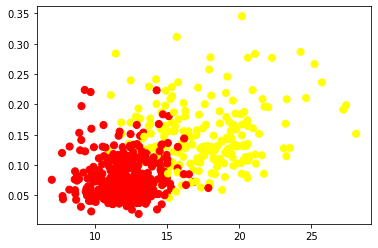

In [108]:
plt.scatter(wdbc_df["radius_mean"], wdbc_df["compactness_mean"], c=wdbc_df["diagnosis"], s=50, cmap='autumn');

In [186]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                  model.support_vectors_[:, 1],
                  s=300, linewidth=1, facecolors='none');
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
def plot_3D(X1,X2, y, elev=30, azim=30):
    r = np.exp(-(train_data ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X1,X2, r , c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    


In [644]:
from sklearn.svm import SVC

features = ["radius_mean","perimeter_mean","area_mean","compactness_mean","concavity_mean", "concave points_mean"]

train_data = wdbc_df[features].values.tolist()
test_data = wdbc_df['diagnosis'].values.tolist()

x_train, x_test, y_train, y_test = train_test_split(train_data,
                                 test_data,
                                 random_state=np.random,
                                train_size=0.8)

SVM = SVC()

SVM.fit(x_train,y_train)

y_pred = SVM.predict(x_test)

print("SVM Model Prediction Accuracy: %.2f%%" %(accuracy_score(y_test, y_pred)*100))

SVM Model Prediction Accuracy: 81.58%


In [822]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

features = ["radius_mean","perimeter_mean","area_mean","compactness_mean","concavity_mean", "concave points_mean"]

train_data = wdbc_df[features]
test_data = wdbc_df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(train_data,
                                 test_data,
                                 random_state=np.random,
                                train_size=0.7)


params = {'kernel':["linear", "poly", "rbf", "sigmoid"],
         "C": range(1,12)}

SVM = SVC()

grid = GridSearchCV(SVM, param_grid=params)

grid.fit(x_train,y_train)

y_pred = grid.predict(x_test)

print("The Optimal Parameters using 5 fold cross_validtion:")
print("The Best Score: %.2f%%"%(grid.best_score_ * 100))
print("The Best params of SVM:", grid.best_params_)
print("SVM Model Prediction Accuracy: %.2f%%" %(accuracy_score(y_test, y_pred)*100))

The Optimal Parameters using 5 fold cross_validtion:
The Best Score: 91.96%
The Best params of SVM: {'C': 11, 'kernel': 'linear'}
SVM Model Prediction Accuracy: 88.89%


In [634]:
from sklearn.tree import DecisionTreeClassifier

features = ["radius_mean","perimeter_mean","area_mean","compactness_mean","concavity_mean", "concave points_mean"]

train_data = wdbc_df[features]
test_data = wdbc_df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(train_data,
                                 test_data,
                                 random_state=np.random,
                                train_size=0.8)

DT = DecisionTreeClassifier()

DT.fit(x_train,y_train)

y_pred = DT.predict(x_test)

print("DT Model Prediction Accuracy: %.2f%%" %(accuracy_score(y_test, y_pred)*100))

DT Model Prediction Accuracy: 89.47%


In [826]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

features = ["radius_mean","perimeter_mean","area_mean","compactness_mean","concavity_mean", "concave points_mean"]

train_data = wdbc_df[features]
test_data = wdbc_df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(train_data,
                                 test_data,
                                 random_state=np.random,
                                train_size=0.7)

params = {'max_features': [None, 'auto', 'sqrt', 'log2'],
          'max_depth': range(1, 50)}


DT = DecisionTreeClassifier()

grid = GridSearchCV(DT, param_grid=params)

grid.fit(x_train,y_train)

y_pred = grid.predict(x_test)

print("The Optimal Parameters using 5 fold cross_validtion:")
print("The Best Score: %.2f%%"%(grid.best_score_ * 100))
print("The Best params of DT :", grid.best_params_)
print("DT Model Prediction Accuracy: %.2f%%" %(accuracy_score(y_test, y_pred)*100))

The Optimal Parameters using 5 fold cross_validtion:
The Best Score: 91.45%
The Best params of DT : {'max_depth': 15, 'max_features': None}
DT Model Prediction Accuracy: 92.40%


In [659]:
from sklearn.ensemble import RandomForestClassifier

all_features = wdbc_df.iloc[:,1:]

train_data = wdbc_df[all_features.columns]
test_data = wdbc_df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(train_data,
                                 test_data,
                                 random_state=np.random,
                                train_size=0.7)

RF = RandomForestClassifier()

RF.fit(x_train,y_train)

y_pred = RF.predict(x_test)

print("The RF Model Prediction Accuracy: %.2f%%" %(accuracy_score(y_test, y_pred)*100))

The RF Model Prediction Accuracy: 95.32%


In [837]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

all_features = wdbc_df.iloc[:,1:]

train_data = wdbc_df[all_features.columns]
test_data = wdbc_df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(train_data,
                                 test_data,
                                 random_state=np.random,
                                train_size=0.7)
params = {'n_estimators': range(1,50,5),
         'criterion': ['entropy', 'gini'],
         "random_state": range(6)}

RF = RandomForestClassifier()

grid = GridSearchCV(RF, param_grid=params, cv=5)

grid.fit(x_train,y_train)

y_pred = grid.predict(x_test)

print("The Optimal Parameters using 5 fold cross_validtion:")
print("The Best Score: %.2f%%"%(grid.best_score_ * 100))
print("The Best params of DT :", grid.best_params_)
print("The RF Model Prediction Accuracy: %.2f%%" %(accuracy_score(y_test, y_pred)*100))

The Optimal Parameters using 5 fold cross_validtion:
The Best Score: 96.48%
The Best params of DT : {'criterion': 'entropy', 'n_estimators': 31, 'random_state': 3}
The RF Model Prediction Accuracy: 96.49%


In [620]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

all_features = wdbc_df.iloc[:,1:]

train_data = wdbc_df[all_features.columns]
test_data = wdbc_df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(train_data,
                                 test_data,
                                 random_state=np.random,
                                train_size=0.7)

models = {'KNN':KNeighborsClassifier(), "SVM":SVC(),"DT":DecisionTreeClassifier()}

for name, model in models.items():
    baggingModel = BaggingClassifier(base_estimator=model, 
                            n_estimators=500,
                            random_state=42)
    baggingModel.fit(x_train,y_train)

    y_pred = baggingModel.predict(x_test)

    print(f"The {name} Model Prediction Accuracy using Bagging: %.2f%%" %(accuracy_score(y_test, y_pred)*100))

The KNN Model Prediction Accuracy using Bagging: 93.57%
The SVM Model Prediction Accuracy using Bagging: 90.64%
The DT Model Prediction Accuracy using Bagging: 94.74%


In [694]:
from sklearn.ensemble import AdaBoostClassifier

features = ["radius_mean","perimeter_mean","area_mean","compactness_mean","concavity_mean", "concave points_mean"]

train_data = wdbc_df[features]
test_data = wdbc_df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(train_data,
                                 test_data,
                                 random_state=np.random,
                                train_size=0.7)

adaboost = AdaBoostClassifier(base_estimator=SVC() ,n_estimators=500, random_state=41, algorithm='SAMME')

adaboost.fit(x_train,y_train)

y_pred = adaboost.predict(x_test)

print("The AdaBoost Model Prediction Accuracy: %.2f%%" %(accuracy_score(y_test, y_pred)*100))

The AdaBoost Model Prediction Accuracy: 64.33%


In [706]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier

features = ["radius_mean","perimeter_mean","area_mean","compactness_mean","concavity_mean", "concave points_mean"]

train_data = wdbc_df[features]
test_data = wdbc_df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(train_data,
                                 test_data,
                                 random_state=np.random,
                                train_size=0.7)

models = {"SVM":SVC(),"DT":DecisionTreeClassifier()}

print(f"AdaBoost with KNN: NOT SUPPORTED")
for name, model in models.items():
    adaboost = AdaBoostClassifier(base_estimator=model, 
                            n_estimators=500,
                            random_state=42,
                            algorithm='SAMME')
    adaboost.fit(x_train,y_train)

    y_pred = adaboost.predict(x_test)

    print(f"The Prediction Accuracy of AdaBoost with {name}:  %.2f%%" %(accuracy_score(y_test, y_pred)*100))

AdaBoost with KNN: NOT SUPPORTED
The Prediction Accuracy of AdaBoost with SVM:  62.57%
The Prediction Accuracy of AdaBoost with DT:  91.23%


In [763]:
from sklearn.ensemble import GradientBoostingClassifier

features = ["radius_mean","perimeter_mean","area_mean","compactness_mean","concavity_mean", "concave points_mean"]

train_data = wdbc_df[features]
test_data = wdbc_df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(train_data,
                                 test_data,
                                 random_state=np.random,
                                train_size=0.7)

GBC = GradientBoostingClassifier(n_estimators=500,
                                random_state=42)
GBC.fit(x_train,y_train)

y_pred = GBC.predict(x_test)

print(f"The Prediction Accuracy of GradientBoosting with {name}:  %.2f%%"%(accuracy_score(y_test, y_pred)*100))

The Prediction Accuracy of GradientBoosting with DT:  90.06%


In [753]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

features = ["radius_mean","perimeter_mean","area_mean","compactness_mean","concavity_mean", "concave points_mean"]

train_data = wdbc_df[features]
test_data = wdbc_df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(train_data,
                                 test_data,
                                 random_state=np.random,
                                train_size=0.7)

params = {'loss': ['deviance', 'exponential'],
         'subsample': [0.23, 0.45, 0.64, 0.72, 0.8, 0.95, 1.0],
         "n_estimators": [50, 100, 250, 500]}

GBC = GradientBoostingClassifier()

grid = GridSearchCV(GBC, param_grid=params, cv=5)

grid.fit(x_train,y_train)

y_pred = grid.predict(x_test)

print("The Optimal Parameters using 5 fold cross_validtion:")
print("The Best Score: %.2f%%"%(grid.best_score_ * 100))
print("The Best params of DT :", grid.best_params_)
print(f"The Prediction Accuracy of GradientBoosting with {name} using the best params:  %.2f%%"%(accuracy_score(y_test, y_pred)*100))

The Optimal Parameters using 5 fold cross_validtion:
The Best Score: 91.96%
The Best params of DT : {'loss': 'deviance', 'n_estimators': 250, 'subsample': 0.64}
The Prediction Accuracy of GradientBoosting with DT using the best params:  94.74%


In [816]:
from xgboost import XGBClassifier

features = ["radius_mean","perimeter_mean","area_mean","compactness_mean","concavity_mean", "concave points_mean"]

train_data = wdbc_df[features]
test_data = wdbc_df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(train_data,
                                 test_data,
                                 random_state=np.random,
                                train_size=0.7)

XGBoost = XGBClassifier(random_state = 42)

XGBoost.fit(x_train,y_train)

y_pred = XGBoost.predict(x_test)

print(f"The Prediction Accuracy of XGBoost with {name}:  %.2f%%"%(accuracy_score(y_test, y_pred)*100))

The Prediction Accuracy of XGBoost with DT:  90.64%


In [799]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

features = ["radius_mean","perimeter_mean","area_mean","compactness_mean","concavity_mean", "concave points_mean"]

train_data = wdbc_df[features]
test_data = wdbc_df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(train_data,
                                 test_data,
                                 random_state=np.random,
                                train_size=0.7)

params = {'subsample': [0.23, 0.45, 0.64, 0.72, 0.8, 0.95, 1.0],
         "n_estimators": [50, 250, 500, 1000],
         "random_state": [50, 500, 1000],
         'learning_rate': [0.05]}

XGBoost = XGBClassifier()

grid = GridSearchCV(XGBoost, param_grid=params, cv=5)

grid.fit(x_train,y_train)

y_pred = grid.predict(x_test)

print("The Optimal Parameters using 5 fold cross_validtion:")
print("The Best Score: %.2f%%"%(grid.best_score_ * 100))
print("The Best params of DT :", grid.best_params_)
print(f"The Prediction Accuracy of XGBoost with {name} using the best params:  %.2f%%"%(accuracy_score(y_test, y_pred)*100))

The Optimal Parameters using 5 fold cross_validtion:
The Best Score: 92.21%
The Best params of DT : {'learning_rate': 0.05, 'n_estimators': 1000, 'random_state': 500, 'subsample': 0.45}
The Prediction Accuracy of XGBoost with DT using the best params:  91.81%
